ถ้าไม่ได้ใช้ Colab อาจจะต้องติดตั้ง Library ก่อน

In [21]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


### Open Goverment Data of Thailand
ตัวอย่างการนำข้อมูลมาทำ Virtualize จะใช้
ฐานข้อมูลเปิดภาครัฐนักพัฒนาสามารถเรียกใช้ผ่าน [API](https://data.go.th/pages/data-go-th-api) ได้

- ไปที่ [Open Goverment Data of Thailand](https://data.go.th/)  กดเลือก [สำหรับนักพัฒนา](https://opend.data.go.th/register_api/)
- สมัครเป็นผู้ใช้ยืนยันอีเมลล์จะได้ User Token ออกมา 
- เอาไปใส่ใน secret ชื่อ opend_data 
- กลับไปที่หน้าเวปเลือกชุดข้อมูล รูปแบบเป็น API ใช้ ["สถิติผู้เข้าใช้/เข้าชมหน่วนงานกรมศิลปากร"](https://data.go.th/dataset/mis_fad001) เป็นตัวอย่าง
- โค้ดดึงข้อมูลผ่าน API ทำการจัดรูปเพื่อแสดงผลบนหน้าจอ

In [17]:
import requests
import json
resource_id="c2a299e0-1270-4d7f-903a-739e7f2eeb75"
url = "https://opend.data.go.th/get-ckan/datastore_search?resource_id="+resource_id+"&limit=5"

header = {
    'api-key': 'API_KEY' # userdata.get('opend_data')
}
response = requests.request("GET",url,headers=header)
json_data = json.loads(response.text)
formated_data = json.dumps(json_data,ensure_ascii=False, indent=2)
print(formated_data)

{
  "help": "https://data.go.th/api/3/action/help_show?name=datastore_search",
  "success": true,
  "result": {
    "include_total": true,
    "limit": 5,
    "records_format": "objects",
    "resource_id": "c2a299e0-1270-4d7f-903a-739e7f2eeb75",
    "total_estimation_threshold": null,
    "records": [
      {
        "_id": 1,
        "MONTHYEAR_TEXT": "มกราคม 2565",
        "ORG_NAME": "สำนักการสังคีต",
        "SUBORG_NAME": "โรงละครแห่งชาติ ภาคตะวันตก จังหวัดสุพรรณบุรี",
        "SUBINS_NAME": "",
        "TH_MALE_VISITOR": "0",
        "TH_FEMALE_VISITOR": "0",
        "TH_TOTAL_VISITOR": "0",
        "OTH_MALE_VISITOR": "0",
        "OTH_FEMALE_VISITOR": "0",
        "OTH_TOTAL_VISITOR": "0",
        "STUDENT_MALE": "0",
        "STUDENT_FEMALE": "0",
        "STUDENT_TOTAL": "0",
        "PRIEST_MALE": "0",
        "PRIEST_FEMALE": 0,
        "PRIEST_TOTAL": "0",
        "GOVGUEST_MALE": "0",
        "GOVGUEST_FEMALE": "0",
        "GOVGUEST_TOTAL": "0",
        "TOTAL_MALE_VISI

- ใช้ pandas ทำออกมาเป็นตาราง

In [18]:
import pandas as pd
df = pd.DataFrame(json_data["result"]["records"])
df[["ORG_NAME","SUBORG_NAME","TOTAL_MALE_VISITOR","TOTAL_FEMALE_VISITOR"]]

,ORG_NAME,SUBORG_NAME,TOTAL_MALE_VISITOR,TOTAL_FEMALE_VISITOR
0,สำนักการสังคีต,โรงละครแห่งชาติ ภาคตะวันตก จังหวัดสุพรรณบุรี,0,0
1,สำนักการสังคีต,โรงละครแห่งชาติ ภาคตะวันออกเฉียงเหนือ จังหวัดน...,0,0
2,สำนักการสังคีต,โรงละครแห่งชาติ,50,100
3,สำนักช่างสิบหมู่,สำนักช่างสิบหมู่,14,4
4,สำนักพิพิธภัณฑสถานแห่งชาติ,พิพิธภัณฑสถานแห่งชาติ พระนคร,"4,725","6,458"


- matplotlib ไม่รองรับฟอนต์ภาษาไทยให้ติดตั้งฟอนต์ TH Sarabun New วิธีการมาจาก[ที่นี้](https://medium.com/@dear-pinpinut/solving-the-thai-font-display-issue-in-matplotlib-on-google-colab-7604accd963a)

In [19]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') 
mpl.rc('font', family='TH Sarabun New') # Setting the default

--2025-06-06 01:11:56--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2025-06-06 01:11:57--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.1’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.007s  

2025-06-06 01:11:57 (13.1 MB/s

- เปลี่ยนค่า TOTAL_FEMALE_VISITOR ให้เป็นตัวเลขก่อนที่จะไปทำกราฟ

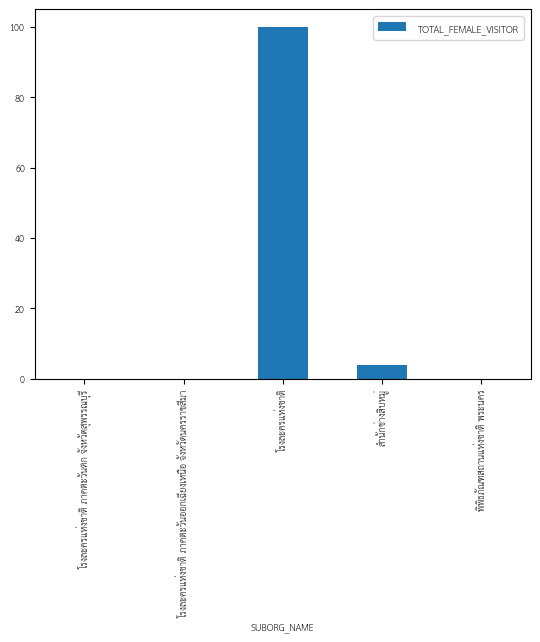

In [20]:
import matplotlib.pyplot as plt
# errors='coerce' converts non-numeric values to NaN
df['TOTAL_FEMALE_VISITOR'] = pd.to_numeric(df['TOTAL_FEMALE_VISITOR'], errors='coerce')
df.plot(x = 'SUBORG_NAME', y = 'TOTAL_FEMALE_VISITOR', kind='bar')
plt.show()